In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
carsDataset = pd.read_csv("Cars-dataset.csv")

#creditData = pd.read_csv("credit.csv")
carsDataset.head(10) #several missing values!

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0
5,21,Male,0,0,3,9.5,7.1,0,0
6,23,Male,1,1,3,11.7,7.2,0,0
7,23,Male,0,0,0,6.5,7.3,0,0
8,24,Male,1,0,4,8.5,7.5,0,0
9,28,Male,1,0,6,13.7,7.5,1,0


In [3]:
carsDataset.shape

(418, 9)

In [4]:
carsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    object 
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [5]:
carsDataset['Opt_service'].value_counts()

0    383
1     35
Name: Opt_service, dtype: int64

In [6]:
carsDataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,418.0,27.334928,4.153272,18.0,25.000,27.0,29.000,43.0
Engineer,418.0,0.748804,0.434221,0.0,0.250,1.0,1.000,1.0
MBA,418.0,0.260766,0.439578,0.0,0.000,0.0,1.000,1.0
Work Exp,418.0,5.873206,4.816110,0.0,3.000,5.0,8.000,24.0
Salary,418.0,15.418421,9.660234,6.5,9.625,13.0,14.900,57.0
Distance,418.0,11.306220,3.722143,3.2,8.600,10.9,13.575,23.4
license,418.0,0.205742,0.404727,0.0,0.000,0.0,0.000,1.0
Opt_service,418.0,0.083732,0.277317,0.0,0.000,0.0,0.000,1.0


In [7]:
for feature in carsDataset.columns: # Loop through all columns in the dataframe
    if carsDataset[feature].dtype == 'object': # Only apply for columns with categorical strings
        carsDataset[feature] = pd.Categorical(carsDataset[feature])# Replace strings with an integer
carsDataset.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0
5,21,Male,0,0,3,9.5,7.1,0,0
6,23,Male,1,1,3,11.7,7.2,0,0
7,23,Male,0,0,0,6.5,7.3,0,0
8,24,Male,1,0,4,8.5,7.5,0,0
9,28,Male,1,0,6,13.7,7.5,1,0


In [8]:
carsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          418 non-null    int64   
 1   Gender       418 non-null    category
 2   Engineer     418 non-null    int64   
 3   MBA          418 non-null    int64   
 4   Work Exp     418 non-null    int64   
 5   Salary       418 non-null    float64 
 6   Distance     418 non-null    float64 
 7   license      418 non-null    int64   
 8   Opt_service  418 non-null    int64   
dtypes: category(1), float64(2), int64(6)
memory usage: 26.8 KB


In [9]:
replaceStruct = {               "Gender":     {"Male": 1, "Female": 0 }}
            

In [10]:
carsDataset=carsDataset.replace(replaceStruct)
carsDataset['Gender'] = carsDataset['Gender'].astype(int)

In [11]:
carsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    int32  
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 27.9 KB


### Check feature co-relation with target using heatmap 

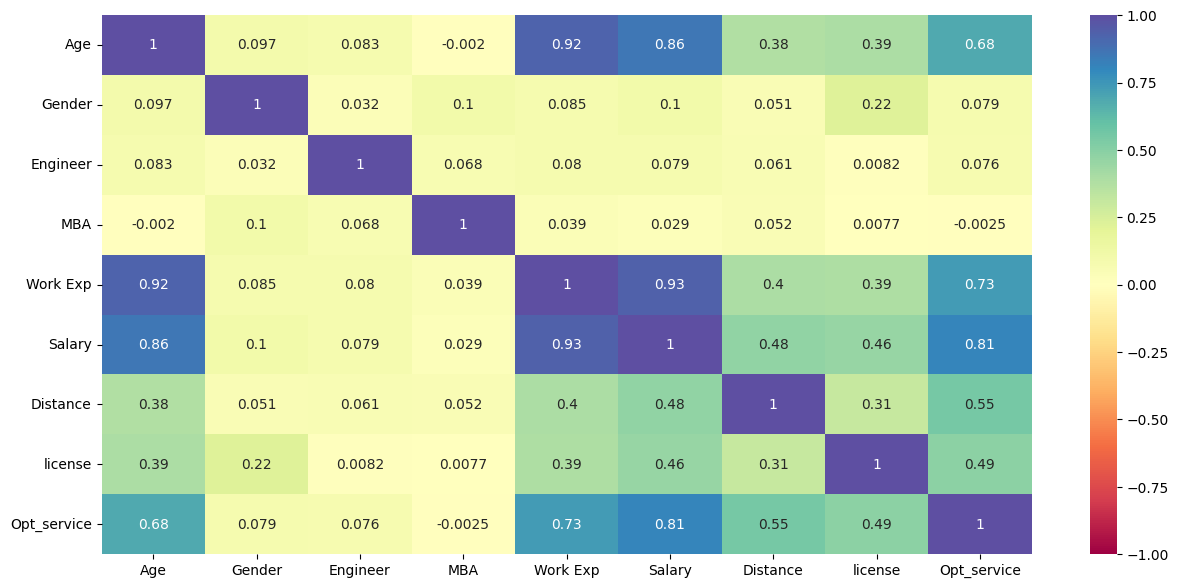

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(carsDataset.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

### Split train and test data without using stratify

In [13]:
X = carsDataset.drop("Opt_service" , axis=1)
y = carsDataset.pop("Opt_service")


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [15]:
X_train['Gender'].value_counts()

1    205
0     87
Name: Gender, dtype: int64

In [16]:
X_test['Gender'].value_counts()

1    92
0    34
Name: Gender, dtype: int64

In [17]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    f1_train = f1_score(y_train, pred_train)  # to compute F1-score
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on train set : ",f1_score(y_train, pred_train))  # to compute F1-score
        print("F1 Score on test set : ",f1_score(y_test, pred_test))  # to compute F1-score
        

    return score_list # returning the list with train and test scores

In [19]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [20]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Bagging Classifier with default parameters

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision    F1
0   0.97619     1.0   0.785714  0.88


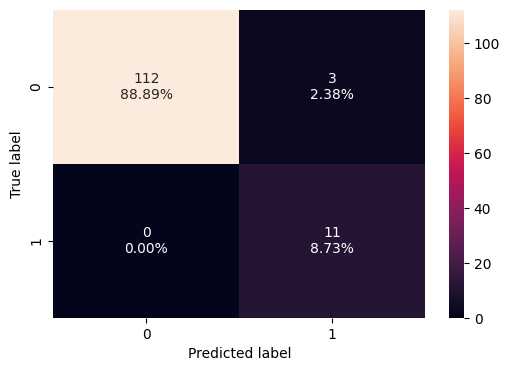

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

### RandomForest Classifier with default parameters

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


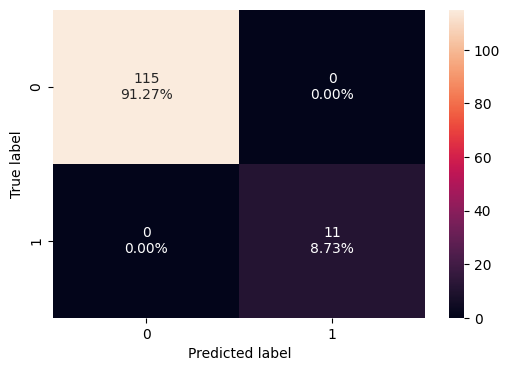

In [22]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

### BaggingClassifier with LogisticRegression as base estimator.

Training performance:
    Accuracy    Recall  Precision       F1
0  0.989726  0.916667   0.956522  0.93617
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.984127     1.0   0.846154  0.916667


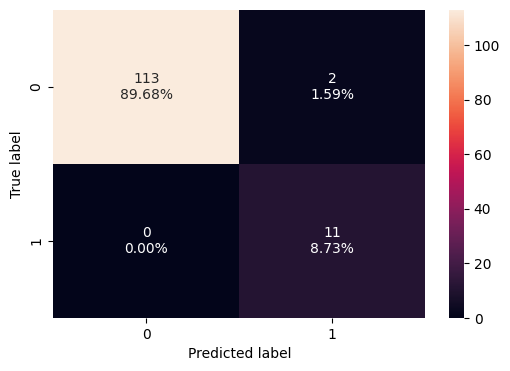

In [23]:
#Fitting the model
bagging_classifier = BaggingClassifier(LogisticRegression(),random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

### BaggingClassifier with DecisionTreeClassifier as base estimator and various maxDepth from 1 to 5

In [24]:
acc_scorer1 = []
# Choose the type of classifier. 
for max_depth in range(1,6,1):
        # Initialize the base estimator
        print("Train :", max_depth)
        base_estimator = DecisionTreeClassifier(max_depth=max_depth)
        
        # Initialize the bagging classifier with the base estimator
        bagging_classifier = BaggingClassifier(base_estimator, random_state=1)
        bagging_classifier.fit(X_train,y_train)

        # Type of scoring used to compare parameter combinations
        acc_scorer1.append(metrics.make_scorer(metrics.recall_score))
        bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
        print("Training performance:\n",bagging_classifier_model_train_perf)




Train : 1
Training performance:
    Accuracy  Recall  Precision    F1
0  0.972603   0.875   0.807692  0.84
Train : 2
Training performance:
    Accuracy    Recall  Precision        F1
0  0.996575  0.958333        1.0  0.978723
Train : 3
Training performance:
    Accuracy    Recall  Precision        F1
0  0.996575  0.958333        1.0  0.978723
Train : 4
Training performance:
    Accuracy    Recall  Precision        F1
0  0.996575  0.958333        1.0  0.978723
Train : 5
Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


### Model Testing using AdaBoost, GradientBoostingClassifier and XGBoostClassifier

In [25]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [32]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0
F1 Score on test set :  1.0


In [27]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [33]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  1.0
Accuracy on test set :  0.9920634920634921
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1 Score on test set :  1.0


In [29]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [34]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9920634920634921
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1 Score on test set :  1.0


### Feature importance in Gradient Booster Classifier

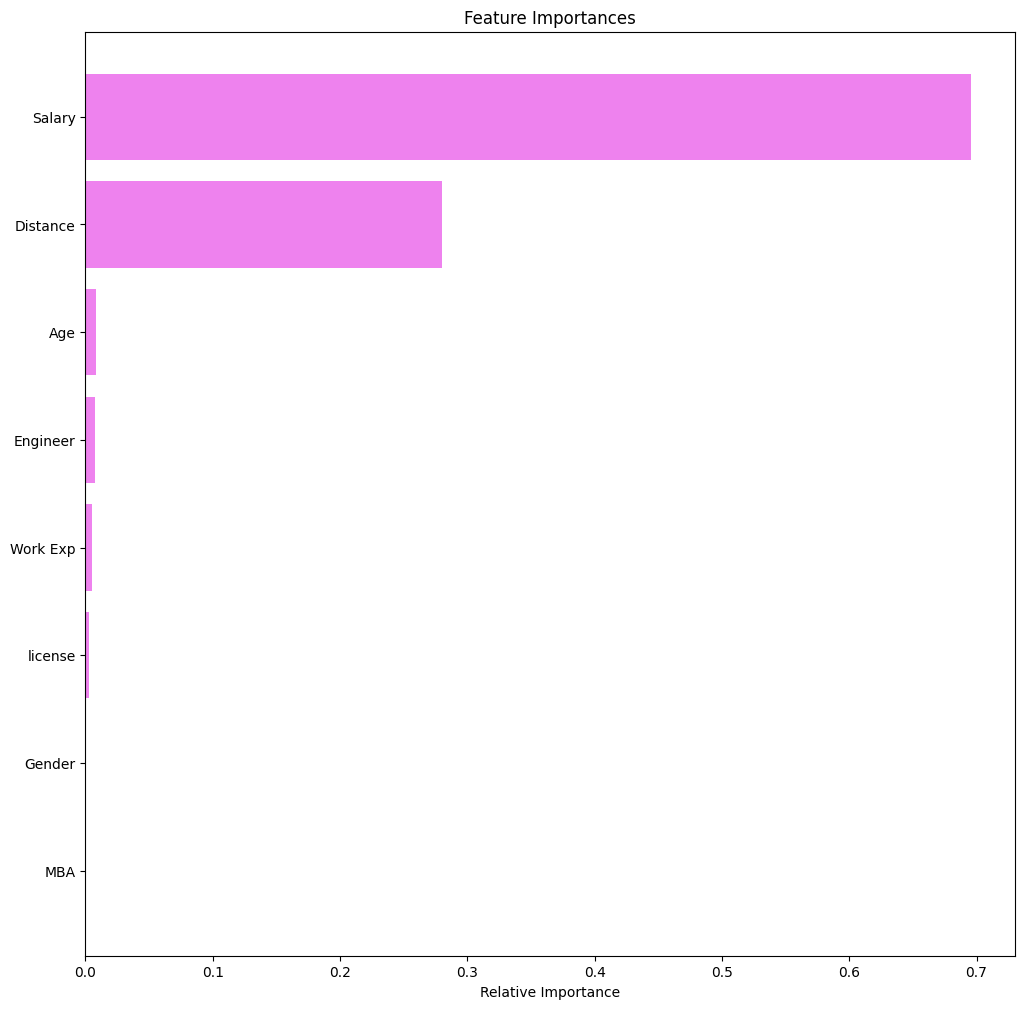

In [35]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### M3 : Gradient Boosting M1, M2, M3 with n_estimators = 5,100,400 with learning_rate = 0.01


In [38]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier( learning_rate=0.01,random_state=1)


# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,100,400],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)# Set the clf to the best combination of parameters


GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, random_state=1)

In [41]:
gbc_score=get_metrics_score(gbc_tuned)


Accuracy on training set :  1.0
Accuracy on test set :  0.9761904761904762
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.7857142857142857
F1 Score on train set :  1.0
F1 Score on test set :  0.88


In [43]:
results = grid_obj.cv_results_

# Print the F1 score for each parameter combination
for mean_test_score, params in zip(results['mean_test_score'], results['params']):
    # Initialize the model with the current parameters
    model = GradientBoostingClassifier(**params, learning_rate=0.01, random_state=1)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    pred_train = model.predict(X_train)
    # Calculate F1 score
    f1 = f1_score(y_train, pred_train, average='weighted')
    
    print(f"Params: {params}, F1 Score: {f1:.4f}")


Params: {'n_estimators': 50}, F1 Score: 0.8785
Params: {'n_estimators': 100}, F1 Score: 0.9965
Params: {'n_estimators': 400}, F1 Score: 1.0000


### Stacking : Build a stacking classifier using two models - Decision Tree, Bagging Classifier as base estimators and use Random Forest as the final estimator.



In [44]:
from sklearn.ensemble import StackingClassifier

In [46]:
decision_tree = DecisionTreeClassifier(random_state=1)
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=1)

# Define final estimator
random_forest = RandomForestClassifier(random_state=1)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('bagging', bagging_clf)
    ],
    final_estimator=random_forest
)



In [50]:
# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)
y_pred1 = stacking_clf.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
gbc_score=get_metrics_score(stacking_clf)


Accuracy on training set :  0.9897260273972602
Accuracy on test set :  0.9841269841269841
Recall on training set :  0.875
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.8461538461538461
F1 Score on train set :  0.9333333333333333
F1 Score on test set :  0.9166666666666666


### Stacking : Build a stacking classifier using two models - AdaBoost classifier, and Gradient Boosting Classifier as base estimators and use XGBoost as the final estimator.


In [53]:
adaboost = AdaBoostClassifier(random_state=1)
gradient_boosting = GradientBoostingClassifier(random_state=1)

# Define final estimator
xgboost = XGBClassifier(random_state=1)

# Create the stacking classifier
stacking_clf1 = StackingClassifier(
    estimators=[
        ('adaboost', adaboost),
        ('gradient_boosting', gradient_boosting)
    ],
    final_estimator=xgboost
    
)

# Train the stacking classifier
stacking_clf1.fit(X_train, y_train)



StackingClassifier(estimators=[('adaboost', AdaBoostClassifier(random_state=1)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [54]:
gbc_score=get_metrics_score(stacking_clf1)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0
F1 Score on train set :  1.0
F1 Score on test set :  1.0
